<a href="https://colab.research.google.com/github/ferit-ml/lv9-adrijanmalinovic/blob/main/RUSU_LV9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Podržano učenje

Podržano učenje (*reinforcement learning*) je posebna vrsta strojnog učenja, različita od nadziranog i nenadziranog učenja. Za razliku od nadziranog i nenadziranog učenja, kod podržanog učenja nemamo podatkovni skup s ulaznim (i izlaznim) podacima, nego imamo nekakvo okruženje pomoću kojeg treniramo agenta.

Agent se nalazi u nekakvom okruženju (*environment*) u kojem može obavljati određene akcije. U svakom trenutku je agent u određenom stanju. Nakon što agent obavi nekakvu akciju u određenom stanju, okruženje agenta stavlja u novo stanje i nagrađuje (ili kažnjava) ga za odrađenu akciju. U ovom LV-u ćemo promatrati slučaj u kojem je vrijeme diskretno, postoji ograničeni skup akcija i ograničeni skup stanja.

Definiramo sljedeće izraze:
- $t$ - vremenski trenutak
- $a_t$ - akcija u trenutku $t$
- $\mathcal{A}$ - skup akcija
- $s_t$ - stanje u trenutku $t$
- $\mathcal{S}$ - skup stanja
- $r_t$ - nagrada u trenutku $t$
- $a_{t+1}$ - akcija u trenutku $t+1$
- $s_{t+1}$ - stanje u trenutku $t+1$
- $s_{t+1}$ - nagrada u trenutku $t+1$

Agent se u trenutku $t$ nalazi u stanju $s_t$ te obavlja akciju $a_t$. Okruženje ga zatim stavlja u stanje $s_{t+1}$ te mu daje nagradu $r_{t+1}$. Prikaz ovakvog sustava prikazan je na shemi.

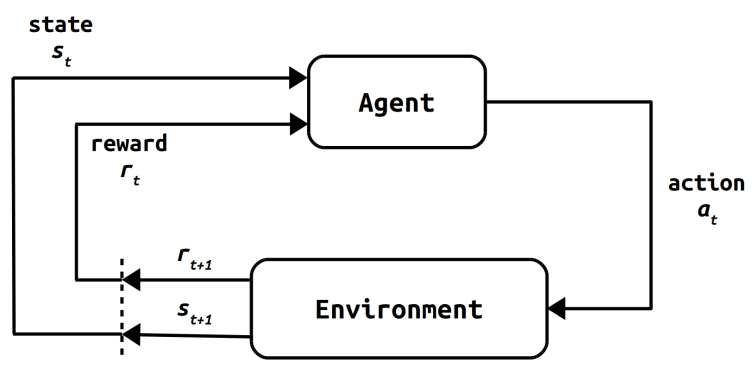

## *Q-learning*

Q-learning je algoritam za učenje tzv. q-vrijednosti. q-vrijednost neke akcije $a$ u stanju $s$ je procjena nagrade akcije $a$ u stanju $s$. Ova procjena ne uključuje samo trenutnu nagradu nego i moguće buduće nagrade (kazne). Odnosno, možemo definirati funkciju Q:

$$Q: \mathcal{S} \times \mathcal{A} \to \mathbb{R}$$

q-vrijednosti možemo promatrati kao tablicu gdje nam retci označavaju sva moguća stanja ($\forall s \in \mathcal{S})$, a stupci sve moguće akcije ($\forall a \in \mathcal{A}$).

| -      | Action 1 ($a^1$) | Action 2 ($a^2$) | Action 3 ($a^3$) | Action 4 ($a^4$) |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| State 1 ($s^1$) | Q($s^1, a^1$) | Q($s^1, a^2$) | Q($s^1, a^3$) | Q($s^1, a^4$) |
| State 2 ($s^2$) | Q($s^2, a^1$) | Q($s^2, a^2$) | Q($s^2, a^3$) | Q($s^2, a^4$) |
| ... | ... | ... | ... | ... |


Prije svega inicijaliziramo q-vrijednosti na neku zadanu početnu vrijednost za sva stanja i sve akcije u tim stanjima. q-vrijednosti učimo na sljedeći način:

1. Agent se u trenutku $t$ nalazi u stanju $s_t$. Odabire akciju $a_t$ koju će odraditi.
2. Okruženje daje nagradu (ili kaznu) $r_{t+1}$ i stavlja agenta u stanje $s_{t+1}$
3. $Q(s_t, a_t)$ se ažurira

Ovaj proces ponavljamo dok agent ne dođe u neko konačno stanje, primjerice *smrt* u slučaju agenta u nekakvoj video igri. Ovo nazivamo epizodom te treniranje možemo vršiti proizvoljan broj epizoda.

In [80]:
def bellman_equation(alpha, gamma, old_q_t, reward, max_q_a):
    return (1 - alpha) * old_q_t + alpha * (reward + gamma * max_q_a)
    ## alpha - self.lr
    ## gamma - self.discount
    ## self.get_qvalues(state_string_) - gets the numpy array for the given state string

### Ažuriranje q-vrijednosti

Posljednji korak u svakom koraku *Q-learninga* je ažurairanje q-vrijednosti. Ovo činimo pomoću Bellmanove jednadžbe:

$$Q(s_t, a_t) \leftarrow (1 - \alpha)Q(s_t, a_t) + \alpha(r_{t+1} + \gamma \max_a{Q(s_{t+1}, a)})$$

Gdje su:
- $\alpha$ - stopa učenja (*learning rate*)
- $\gamma$ - faktor popusta (*discount factor*)
- $r_{t+1}$ - nagrada dobivena prelaskom iz stanja $s_t$ u stanje $s_{t+1}$

Tako se nova vrijednost $Q(s_t, a_t)$ definira preko tri faktora:
- $(1 - \alpha)Q(s_t, a_t)$ - trenutna vrijednost pomnožena s $(1 - \alpha)$
- $\alpha r_{t+1}$ - nagrada koja se dobije u trenutku $t+1$ nakon što se u stanju $s_t$ učini akcija $a_t$ pomnožena s $\alpha$
- $\alpha \gamma \max\limits_a{Q(s_{t+1}, a)}$ - maksimalna q-vrijednost za stanje $s_{t+1}$ pomnožena s $\alpha$ i $\gamma$

Što je $\alpha$ veći, to će nove informacije više utjecati na novu q-vrijednost. $\gamma$ definira koliko će buduće nagrade, odnosno q-vrijednosti, utjecati na trenutku q-vrijednost. Ako je $\gamma = 0$, algoritam uopće neće uzimati buduće q-vrijednosti u obzir, odnosno bit će *kratkovidan*. Na rezultat *Q-learninga* također može utjecati i odabir inicijalnih q-vrijednosti.

### *Exploitation vs. exploration*

Bitan dio *Q-learninga* je odabir akcije $a$ u stanju $s$. Očiti način je jednostavan odabir akcije s najvećom q-vrijednošću u stanju $s$. Ovakav odabir akcije se naziva eksploatacija (*exploitation*), a takav algoritam bi onda bio pohlepan (*greedy*). Ovakav algoritam bi se potencijalno teško istrenirao jer bi u jednom trenutku isprobao *dobru* akciju i nikad više ne bi isprobao drugu akciju, a među drugim akcijama možda postoji još bolja akcija.

Da bi se ovo izbjeglo, potrebno je uključiti i istraživanje (*exploration*) u algoritam. Jedan od načina da se ovo učini je da se doda vjerojatnost za odabir nasumične akcije, neovisno o q-vrijednostima. Ovaj pristup se naziva *$\epsilon$-greedy* pristup i vjerojatnost za odabir nasumične akcije se označava s $\epsilon$. Na ovaj način se može postići ravnoteža između eksploatacije i istraživanja.

Teško je odrediti *ispravnu* vrijednost parametra $\epsilon$, ali se u praksi često koriste vrijednosti oko $0.1$. Također je moguće prilagođavati vrijednost parametra $\epsilon$ za vrijeme treniranja, pa primjerice početi s većom vrijednosti parametra $\epsilon$ te ju s vremenom smanjivati i na kraju ju postaviti na 0 kako bi se algoritam *fine-tuneao* samo eksploatacijom.

### Nedostaci *Q-learninga*

Postoje određeni problemi *Q-learninga*. Jedan od njih je već spomenut u potrebi ostaviravanja ravnoteže između eksploatacije i istraživanja.

Također moguć problem je pristranost precjenjivanju (*overestimation bias*). Budući da su q-vrijednosti šumovite, uzimanjem maksimalne vrijednosti, dobit će precijenjena vrijednost. Uzmemo li primjerice diskretnu uniformnu razdiobu s vrijednostima 0 i 1, 2 puta izvučemo nasumičan broj iz razdiobe i odaberemo veći, dobit ćemo očekivanu vrijednost od $0.75$ za razliku od stvarne srednje vrijednosti te razdiobe koja je $0.5$. Jedan od načina rješavanja ovog problema je tzv. *double Q-learning*.

Još jedan nedostatak *Q-learninga* je problem visoke dimenzionalnosti kada je moguć velik broj stanja ili akcija. Primjerice, ako nam je promatranje u obliku slike, vrlo je teško modelirati tablicu q-vrijednosti gdje su nam moguća stanja sve moguće vrijednosti promatrane slike. Čest način zaobilaženja ovog problema je upotrebom dubokog (*deep*) *Q-learninga*.

In [81]:
## Importing useful libraries
import os
import math
import numpy as np

import matplotlib.pyplot as plt
from imageio.v2 import imread
%matplotlib inline

from tqdm.notebook import tqdm

from enum import Enum

import random
import pandas as pd

import matplotlib.animation as plt_animation
from matplotlib import rc
rc('animation', html='jshtml')

## Zmijica

Za potrebe ove laboratorijske vježbe, napravljena je jednostavna video igra zmijica. Video igra ne može primati ulaze s računala, odnosno, može se igrati jedino preko poziva u kodu. Igra je implementirana u klasi `Snake` te su implementirane i pomoćna klasa `State` i [enumeracije](https://docs.python.org/3/library/enum.html) `Direction` i `Input`.

`Direction` predstavlja moguće smjerove (i orijentacije) u koje zmijica može gledati, a oni su `UP, RIGHT, DOWN, LEFT`. Uz ovu enumeraciju, definiran je i *dictionary* `direction_dict` koji definira pomake (`[x, y]`) za svaki od smjerova (orijentacija).

`Input` predstavlja moguće naredbe koje zmijica može primiti, a to su `CHILL` za nastavak pravocrtnog kretanja te `RIGHT` i `LEFT` za skretanje desno i lijevo za $90^\circ$.

Klasa `State` se koristi za praćenje stanja zmijice, a sadrži sljedeće atribute i funkcije:
- `apple_front_back` - predstavlja je li jabuka ispred ili iza glave zmijice, ovisi o smjeru u kojem zmijica gleda i poprima sljedeće vrijednosti: (-1, jabuka je iza zmijice), (0, jabuka nije ni ispred ni iza zmijice), (1, jabuka je ispred zmijice)
- `apple_left_right` - analogno `apple_front_back`, predstavlja je li jabuka lijevo ili desno od glave zmijice: (-1, jabuka je lijevo od zmijice), (0, jabuka nije ni lijevo ni desno od zmijice), (1, jabuka je desno od zmijice)
- `danger` - lista koja predstavlja je li zmijica u neposrednoj opasnosti
u sljedećim smjerovima `[ispred, desno, lijevo]`, 1 predstavlja da je neposredna opasnost u tom smjeru, a 0 da nije
- `distance` - euklidska udaljenost između glave zmijice i jabuke
- `dead` - je li zmijica mrtva
- `ate` - je li zmijica upravo pojela jabuku
- `get_state_str()` - ispis stanja zmijice bitan za q-vrijednosti, uključuje `apple_front_back`, `apple_left_right` i `danger`
- `print_state()` - ispisuje stanje zmijice na čovjeku čitljiv način

Također je dostupan i *dictionary* za boje.

Sama klasa `Snake` u konstruktoru prima jedan parametar `board_size` koji definira veličinu polja u kvadratićima. Polje je kvadratnog oblika. Uz pomoćne funkcije, definirane su i funkcije `input`, `get_state` i `draw`.

Funkcija `input` prima jedan parametar klase `Input` te obavlja sve što se dogodi prilikom jednog koraka igre: rotira zmijicu ukoliko je potrebno, pomiče zmijicu, detektira je li zmijica preminula, je li zmijica pojela jabuku te, ako je, generira novu jabuku i produljuje zmijicu.

Funkcija `get_state` vraća trenutno stanje zmije u obliku objekta klase `State`. Funkcija `draw` vraća *sliku* trenutnog stanja igre, odnosno `numpy` polje koje se onda može crtati pomoću `matplotlib` biblioteke. Glavu zmijice crta zelenom bojom, tijelo plavom, a jabuku crvenom bojom. Ukoliko zmijica ugine, glava joj postaje tamno zelena.

Enumeracije su u Pythonu poseban tip klasa u kojima definiramo neke atribute i njihove cjelobrojne vrijednsoti. Na ovaj način možemo osigurati jednostavnu pretvorbu između enumeracija i pripadnih cjelobrojnih vrijednosti.

Možemo kreirati enumeraciju pomoću broja određene stavke. Primjerice, za kreiranje `DummyEnum.VAL0`, možemo pozvati `DummyEnum(0)`. Isto tako je moguće u suprotnom smjeru djelovati i jednostavno dobiti cjelobrojnu vrijednost određene stavke. Primjerice `DummyEnum.VAL0.value` će vratiti vrijednost `0`. Primjer rada s enumeracijom, prikazan je u sljedećoj ćeliji.

In [82]:
class DummyEnum(Enum):
  VAL0 = 0
  VAL1 = 1
  VAL2 = 2

example_enum = DummyEnum.VAL1

print('enum:            ', example_enum)

print('enum value:      ', example_enum.value)

example_enum_2 = DummyEnum((example_enum.value + 1) % 3)

print('enum incremented:', example_enum_2)

enum:             DummyEnum.VAL1
enum value:       1
enum incremented: DummyEnum.VAL2


In [83]:
colors = {
  'white': [1, 1, 1],
  'blue': [0, 0, 1],
  'green': [0, 1, 0],
  'red': [1, 0, 0],
  'yellow': [1, 1, 0],
  'dark_green': [0, 0.4, 0.2]
}

class Direction(Enum):
  UP = 0
  RIGHT = 1
  DOWN = 2
  LEFT = 3

direction_dict = {
  0: [-1, 0], ## UP
  1: [0, 1],  ## RIGHT
  2: [1, 0],  ## DOWN
  3: [0, -1]  ## LEFT
}

class Input(Enum):
  CHILL = 0
  TURN_RIGHT = 1
  TURN_LEFT = 2

class State():
  def __init__(self, apple_front_back, apple_left_right, danger, distance, dead, ate):
    ## -1 for back, 0 for neither, 1 for front
    ## up, down => state_1; left, right => state_2
    self.apple_front_back = apple_front_back
    ## -1 for left, 0 for neither, 1 for right
    ## up, down => state_2; left, right => state_1
    self.apple_left_right = apple_left_right
    ## 0 no danger, 1 danger; [front, right, left]
    self.danger = danger
    self.distance = distance
    self.dead = dead
    self.ate = ate

  def get_state_str(self):
    return str([self.apple_front_back, self.apple_left_right, *self.danger])

  def print_state(self):
    print('state_str:', self.get_state_str())
    print('distance:', self.distance)
    print('dead:', self.dead)
    print('ate:', self.ate)

def array_in_list(arr, lst):
  if np.any(np.all(arr == lst, axis=1)):
    return True
  return False

class SnakeGame():
  def __init__(self, board_size=10):
    if board_size < 10:
      board_size = 10

    self.board_size = board_size
    self.score = 0
    self.dead = False
    self.ate = False

    ## Let the snake start somewhere near middle
    self.head = np.random.randint(board_size // 2 - 2, board_size // 2 + 2, 2)

    self.direction = Direction.RIGHT
    self.snake = [
        self.head - self.direction_delta() - self.direction_delta() - self.direction_delta(),
        self.head - self.direction_delta() - self.direction_delta(),
        self.head - self.direction_delta(),
        self.head
    ]

    self.generate_apple()

  def direction_delta(self):
    return direction_dict[self.direction.value]

  def generate_apple(self):
    self.apple = np.random.randint(0, self.board_size, 2)
    if array_in_list(self.apple, self.snake):
      self.generate_apple()

  def is_danger(self, new_loc):
    '''
    if snake will hit itself or if snake will go out of bounds
    new_loc: location to check for danger
    '''
    return (array_in_list(new_loc, self.snake) or
      np.any((new_loc < 0) | (new_loc >= self.board_size)))

  def input(self, input):
    self.ate = False
    if self.dead:
      return
    if input == Input.TURN_RIGHT:
      self.direction = Direction((self.direction.value + 1) % 4)
    elif input == Input.TURN_LEFT:
      self.direction = Direction((self.direction.value - 1) % 4)

    new_head = self.head + self.direction_delta()
    if self.is_danger(new_head):
      # death
      self.dead = True
      return

    self.head = new_head
    self.snake.append(self.head)
    if np.array_equal(self.head, self.apple):
      self.generate_apple()
      self.score += 1
      self.ate = True
    else:
      self.snake.pop(0)

  def get_state(self):
    x_a, y_a = self.apple
    x_h, y_h = self.head
    direction = self.direction_delta()
    ## non-zero direction
    direction_1 = np.nonzero(direction)[0][0]
    if x_a == x_h:
      state_1 = 0
    else:
      state_1 = direction[direction_1] * (1 if int(x_a > x_h) else -1)
    if y_a == y_h:
      state_2 = 0
    else:
      state_2 = direction[direction_1] * (1 if int(y_a < y_h) else -1) * (-1 if direction_1 else 1)
    ## -1 for back, 0 for neither, 1 for front
    ## up, down => state_1; left, right => state_2
    apple_front_back = state_2 if direction_1 else state_1
    ## -1 for left, 0 for neither, 1 for right
    ## up, down => state_2; left, right => state_1
    apple_left_right = state_1 if direction_1 else state_2
    ## 0 no danger, 1 danger; [front, right, left]
    front = self.head + direction
    right = self.head + direction_dict[(self.direction.value + 1) % 4]
    left = self.head + direction_dict[(self.direction.value - 1) % 4]
    danger = [int(self.is_danger(front)),
              int(self.is_danger(right)),
              int(self.is_danger(left))]

    distance = np.linalg.norm(self.head - self.apple)

    return State(apple_front_back, apple_left_right, danger, distance, self.dead, self.ate)

  def draw(self):
    self.board = np.ones((self.board_size, self.board_size, 3))
    self.board[tuple(self.head)] = colors['dark_green'] if self.dead else colors['green']
    for cell in self.snake[:-1]:
      self.board[tuple(cell)] = colors['blue']
    self.board[tuple(self.apple)] = colors['red']
    return self.board.copy()

In [84]:
class Play():
  def __init__(self, board_size=10):

    '''
    board_size: defines the size of the board (the board is square)
    --------------------------------------------------
    qvalues: dictionary of the q-values where the keys are the states and
              the values are the q-values for each of the actions
    results: list of result dictionaries which have 'game_count' and 'score' keys
    history: list of dictionaries which have 'state' and 'action' keys
              which correspond to states and actions performed in those states
    board_history: list of numpy arrays of the board state, these can be drawn using pyplot
    animation: matplotlib.animation.FuncAnimation object with the animation of the whole game
    '''

    self.board_size = board_size

    self.restart()
    self.qvalues = {}

    self.results = []

  def train_qvalues(self, epsilon=0.1, lr=0.7, discount=0.5,
                    rewards = [10, 5, -10, -2], remove_epsilon=100, starvation=50,
                    max_games=200, update_whole_history=False, verbose=True):
    '''
    train the q-values
    epsilon: epsilon for the epsilon-greedy algorithm
    lr: learning rate (alpha) for the Q-learning algorithm
    discount: gamma parameter in the Bellman equation
    rewards: a list of rewards in the following order: \
            [reward for eating an apple, reward for getting closer to the apple \
            reward for dying (negative), reward for getting further away from the apple(negative)]
    remove_epsilon: number of games after which the epsilon should be set to equal 0
    starvation: maximum amount of time without eating an apple before dying of starvation
    max_games: number of games (episodes) to train for
    update_whole_history: if True, updates the whole history of q-values at each iteration
    verbose: if True, print the result of each game
    '''
    self.lr = lr
    self.discount = discount
    self.apple_reward, self.closer_reward, self.death_reward, self.further_reward = rewards
    self.remove_epsilon = remove_epsilon
    self.starvation = starvation
    self.update_whole_history = update_whole_history

    for game_count in tqdm(range(1, max_games + 1), position=0, leave=True):
      ## restart the game
      self.restart()
      ## if the game_count is high enough, make epsilon = 0
      if game_count > self.remove_epsilon:
        self.epsilon = 0
      else:
        self.epsilon = epsilon
      ## play until dead
      self.play_game(train=True)

      ## generate and store the results of the game for future reference
      results = {
          'game_count': game_count,
          'score': self.game.score
      }
      self.results.append(results)

      if verbose:
        print(results)

  def play_multiple(self, games=40):
    '''
    play multiple games and return the results of each of the games
    games: number of games to play
    '''
    scores = []
    for _ in tqdm(range(games)):
      self.restart()
      self.play_game(train=False)
      scores.append(self.game.score)
    return np.array(scores)

  def play_game(self, train=True):
    '''
    play a game until the snake dies
    train: if True, trains the q-values as well
    '''
    idle = 0
    while not self.dead:
      idle += 1
      ## get an action and perform the action
      action, state = self.get_action()
      if state.ate:
        idle = 0
      self.perform_action(action)
      if idle >= self.starvation:
        self.dead = True
      ## if the q-values are being trained, update them
      if train:
        self.update_qvalues(self.update_whole_history)

  def play_dummy(self):
    self.restart()
    actions = [Input.CHILL, Input.TURN_RIGHT, Input.CHILL, Input.TURN_LEFT, Input.CHILL]
    for action in actions:
      self.perform_action(action)

  def get_qvalues(self, state):
    '''get the q-values for a given state'''
    if state not in self.qvalues:
      self.qvalues[state] = np.zeros(3)

    return self.qvalues[state]

  def print_qvalues(self):
    '''get a pandas DataFrame of the q-values in a human readable format'''
    return pd.DataFrame.from_dict(self.qvalues, orient='index')

  def restart(self):
    '''
    restart the game
    '''
    self.game = SnakeGame(self.board_size)
    self.dead = False
    self.history = []

    self.board_history = []
    self.board_history.append(self.game.draw())

  def get_action(self):
    '''
    get the action for the current state of the game using the epsilon greedy algorithm
    if self.epsilon=0, returns the action with the highest q-value
    also stores the action and the state into self.history list
    '''
    state = self.game.get_state()

    ## epsilon greedy
    rand = random.uniform(0, 1)
    if rand < self.epsilon:
        action = random.choice(list(Input))
    else:
        state_scores = self.get_qvalues(state.get_state_str())
        action = Input(state_scores.argmax())

    ## Remember the actions it took at each state
    self.history.append({
        'state': state,
        'action': action
        })
    return action, state

  def perform_action(self, input):
    '''
    if the snake is not dead, perform the input action
    if the snake dies, set the score and prevent further play
    also always add the board state array to the list
    input: action the snake should take, Input object
    '''
    if not self.dead:
      self.game.input(input)
      ## if the snake died
      if self.game.dead:
        self.score = self.game.score
        self.dead = True
      self.board_history.append(self.game.draw())
    return

  def update_qvalue(self, state, action, future_state=None, death=False):
    '''
    update the q-values using the Bellman equation
    if the snake has died, the last state-action q-value will be set
    to equal the self.death_reward value
    state: state of the last step
    action: action of the last step
    future_state: state after the action of the last step
    death: bool value, true if the snake has died
    '''
    state_str = state.get_state_str()
    action_value = action.value
    if death:
      ## TODO Implement the q-value update on death
      ## q-value is equal to the death reward
      ## there is no future state since game is over
      self.get_qvalues(state_str)[action_value] = self.death_reward
    else:
      if future_state.ate: # Snake ate a food, positive reward
        reward = self.apple_reward
      elif future_state.distance < state.distance: # Snake is closer to the food, positive reward
        reward = self.closer_reward
      else:
        reward = self.further_reward # Snake is further from the food, negative reward

      future_state_str = future_state.get_state_str()

      ## TODO Implement the Bellman equation
      alpha = self.lr
      gamma = self.discount
      old_q_t = self.get_qvalues(state_str)[action_value]
      max_q_a = max(
          self.get_qvalues(state_str)[0],
          self.get_qvalues(state_str)[1],
          self.get_qvalues(state_str)[2]
      )

      self.get_qvalues(state_str)[action_value] = bellman_equation(alpha, gamma, old_q_t, reward, max_q_a)

  def update_qvalues(self, update_whole_history):
    if update_whole_history:
      self.update_qvalues_whole_history()
    else:
      self.update_current_qvalue()

  def update_current_qvalue(self):
    current_state = self.game.get_state() # current state
    previous_state = self.history[-1]['state'] # previous state
    previous_action = self.history[-1]['action'] # action taken at previous state

    self.update_qvalue(previous_state, previous_action, current_state, self.game.dead)

  def update_qvalues_whole_history(self):
    '''
    update the q-values for all the state-action pairs in the current episode
    death: bool value, true if the snake has died
    '''

    ## reverse history, 0th element is the last step
    history = self.history[::-1]
    death = self.dead
    for i, h in enumerate(history[:-1]):
      if death: # Snake Died
        state = history[0]['state']
        action = history[0]['action']

        self.update_qvalue(state, action, death=death)
        death = False

      else:
        current_state = h['state'] # current state
        previous_state = history[i+1]['state'] # previous state
        previous_action = history[i+1]['action'] # action taken at previous state

        self.update_qvalue(previous_state, previous_action, current_state)

  def draw_history(self, save_path = None):
    '''
    draw the whole board_history as images and saves the animation
    save_path: if not None, saves the animation as a gif with the given path
    '''
    fig, ax = plt.subplots()
    im = ax.imshow(self.board_history[0])
    ax.tick_params(
      axis='both',
      which='both',
      bottom=False,
      top=False,
      left=False,
      right=False,
      labelbottom=False,
      labelleft=False)
    def update(i):
      im.set_array(self.board_history[i])
      return im,
    animation_fig = plt_animation.FuncAnimation(fig, update, frames=len(self.board_history), interval=50, blit=True)

    if save_path is not None:
      animation_fig.save(save_path)

    self.animation = animation_fig

## Zadaci

1. Proučite klasu `Snake` i pomoćne klase, isprobajte rad klase kreiranjem objekta iste i odigrajte nekoliko poteza pomoću funkcije `input`. Između poteza ispišite stanje i iscrtajte polje za igru.

2. Proučite klasu `Play`. Sve funkcije su opisane u kodu. Isprobajte funkcije `play_dummy` i `draw_history` kako biste dobili animaciju primjera igranja. Animaciju možete vizualizirati pristupanjem `animation` atributu klase `Play`. Također možete spremiti animaciju kao gif predajom putanje funkciji `draw_history`.

3. Implementirajte ažuriranje q-vrijednosti u funkciji `update_qvalue`. Pokrenite *Q-learning* algoritam i istrenirajte q-vrijednosti pomoću funkcije `train_qvalues`. Proučite i odaberite prikladne parametre. Vizualizirajte posljednju epizodu igre.

4. Korištenjem funkcije `play_multiple` odredite prosječni rezultat nakon treniranja.

5. Dodajte funkcije za spremanje i učitavanje q-vrijednosti. Ponovno istrenirajte q-vrijednosti uz spremanje q-vrijednosti nakon svake epizode. Zatim učitajte q-vrijednosti nakon svake epizode i odredite prosječni rezultat za svaku epizodu treniranja. Prikažite dobivene rezultate na grafu.

6. Ponovite 5. zadatak s različitim parametrima treniranja. Usporedite dobivene rezultate.

7. Izmijenite klasu `State` i funkciju `get_state` klase `SnakeGame` kako biste obuhvatili više informaciju u stanju igre. Prilagodite i druge potrebne funkcije i klase te istrenirajte q-vrijednosti s novom definicijom stanja. Ponovite 5. zadatak za ovu definiciju stanja.

Dodatno: Dodajte tekst za praćenje rezultata u animaciju igre. Dodajte vizualizaciju stanja igre u svakom trenutku u animaciju igre.

## Zadatak 1

state_str: [-1, 1, 0, 0, 0]
distance: 4.242640687119285
dead: False
ate: False
-------------------------------------------------- Turn 0
state_str: [-1, 1, 0, 0, 0]
distance: 5.0
dead: False
ate: False
-------------------------------------------------- Turn 1
state_str: [-1, -1, 0, 0, 0]
distance: 5.656854249492381
dead: False
ate: False
-------------------------------------------------- Turn 2
state_str: [-1, 1, 0, 0, 0]
distance: 6.4031242374328485
dead: False
ate: False
-------------------------------------------------- Turn 3
state_str: [-1, 1, 1, 0, 0]
distance: 7.211102550927978
dead: False
ate: False
-------------------------------------------------- Turn 4
state_str: [-1, -1, 0, 1, 0]
distance: 7.810249675906654
dead: False
ate: False
-------------------------------------------------- Turn 5
state_str: [-1, 1, 1, 1, 0]
distance: 7.810249675906654
dead: True
ate: False
-------------------------------------------------- Turn 6
state_str: [-1, 1, 1, 1, 0]
distance: 7.8102496759066

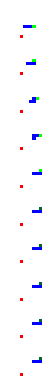

In [85]:
game = SnakeGame(10)

inputs = [
    Input.CHILL,
    Input.TURN_LEFT,
    Input.TURN_RIGHT,
    Input.CHILL,
    Input.TURN_LEFT,
    Input.TURN_RIGHT,
    Input.CHILL,
    Input.TURN_LEFT,
    Input.TURN_RIGHT,
    Input.CHILL,
]

game.get_state().print_state()
print(f'{"-"*50} Turn 0')
for i, inp in enumerate(inputs):
    game.input(inp)
    game.get_state().print_state()
    print(f'{"-"*50} Turn {i+1}')
    plt.subplot(len(inputs),1,i+1)
    plt.axis('off')
    plt.imshow(game.draw())


## Zadatak 2

In [86]:
play = Play(10)

In [87]:
play.play_dummy()

In [88]:
%%capture
## prevent the output of the cell since the plt.imshow()
## shows the image automatically
play.draw_history('animation.gif')

In [89]:
play.animation

## Zadatak 3

In [90]:
play = Play(10)
play.train_qvalues(
    epsilon=0.1,
    lr=0.7,
    discount=0.5,
    rewards=[10, 5, -10, -2],
    remove_epsilon=100,
    starvation=50,
    max_games=200,
    update_whole_history=False,
    verbose=True
)

  0%|          | 0/200 [00:00<?, ?it/s]

{'game_count': 1, 'score': 0}
{'game_count': 2, 'score': 1}
{'game_count': 3, 'score': 1}
{'game_count': 4, 'score': 3}
{'game_count': 5, 'score': 1}
{'game_count': 6, 'score': 2}
{'game_count': 7, 'score': 1}
{'game_count': 8, 'score': 1}
{'game_count': 9, 'score': 3}
{'game_count': 10, 'score': 3}
{'game_count': 11, 'score': 1}
{'game_count': 12, 'score': 1}
{'game_count': 13, 'score': 6}
{'game_count': 14, 'score': 4}
{'game_count': 15, 'score': 6}
{'game_count': 16, 'score': 6}
{'game_count': 17, 'score': 5}
{'game_count': 18, 'score': 5}
{'game_count': 19, 'score': 2}
{'game_count': 20, 'score': 2}
{'game_count': 21, 'score': 0}
{'game_count': 22, 'score': 12}
{'game_count': 23, 'score': 10}
{'game_count': 24, 'score': 10}
{'game_count': 25, 'score': 9}
{'game_count': 26, 'score': 2}
{'game_count': 27, 'score': 1}
{'game_count': 28, 'score': 2}
{'game_count': 29, 'score': 9}
{'game_count': 30, 'score': 3}
{'game_count': 31, 'score': 8}
{'game_count': 32, 'score': 5}
{'game_count':

In [91]:
%%capture
## prevent the output of the cell since the plt.imshow()
## shows the image automatically
play.draw_history('animation.gif')

In [92]:
play.animation

## Zadatak 4